In [55]:
import gzip
from collections import Counter
import dictionary_functions as df
import pvml
import numpy as np
import matplotlib.pyplot as plt

####### Read Files ##########
f=gzip.open("train.txt.gz", "rt")
klass=[]
publisher=[]
title=[]
for line in f:
    k, p, t = line.split("|")
    klass.append(k)
    publisher.append(p)
    title.append(t)

####### Encode Classes and Publishers #########
pub=list(Counter(publisher).keys()) #Get the list of unique publishers
kla=list(Counter(klass).keys()) #Get the list of unique classes

pub_enc=[]
klass_enc=[]
for p in publisher:
    pub_enc.append(pub.index(p)) #use the publisher index in pub to encode publishers
for k in klass:
    klass_enc.append(kla.index(k)) #use the class index in kla to encode classes

y_train=np.array(klass_enc)
t_pub_enc=pub_enc
t_title=title

######## Repeat for Validation and Test Sets #########
####### Read Files ##########
f=gzip.open("validation.txt.gz", "rt")
klass=[]
publisher=[]
title=[]
for line in f:
    k, p, t = line.split("|")
    klass.append(k)
    publisher.append(p)
    title.append(t)

####### Encode Classes and Publishers #########
pub=list(Counter(publisher).keys()) #Get the list of unique publishers
kla=list(Counter(klass).keys()) #Get the list of unique classes
print(len(title))
pub_enc=[]
klass_enc=[]
for p in publisher:
    pub_enc.append(pub.index(p)) #use the publisher index in pub to encode publishers
for k in klass:
    klass_enc.append(kla.index(k)) #use the class index in kla to encode classes

y_val=np.array(klass_enc)
val_pub_enc=pub_enc
val_title=title

####### Read Files ##########
f=gzip.open("test.txt.gz", "rt")
klass=[]
publisher=[]
title=[]
for line in f:
    k, p, t = line.split("|")
    klass.append(k)
    publisher.append(p)
    title.append(t)

####### Encode Classes and Publishers #########
pub=list(Counter(publisher).keys()) #Get the list of unique publishers
kla=list(Counter(klass).keys()) #Get the list of unique classes

pub_enc=[]
klass_enc=[]
for p in publisher:
    pub_enc.append(pub.index(p)) #use the publisher index in pub to encode publishers
for k in klass:
    klass_enc.append(kla.index(k)) #use the class index in kla to encode classes

y_test=np.array(klass_enc)
test_pub_enc=pub_enc
test_title=title


######## Create Dictionary #########
size=1000
stem=False
dic=df.build_dict(t_title, size, True, stemming=stem)

######## Create BoW ########
bow=df.build_bow(t_title, False, "train_bow", size, stemming=stem)
t_pub_enc=np.array(t_pub_enc)


######## Consolidate Features ########
x_train=np.zeros((len(t_pub_enc), size+1))
bow=pvml.whitening(bow)
for i in range(len(t_pub_enc)):
    x_train[i][:-1]=bow[i]
    x_train[i][-1]=t_pub_enc[i]


######## Create BoW ########
bow=df.build_bow(val_title, False, "val_bow", size, stemming=stem)
val_pub_enc=np.array(val_pub_enc)


######## Consolidate Features ########
x_val=np.zeros((len(val_pub_enc), size+1))
bow=pvml.whitening(bow)
for i in range(len(val_pub_enc)):
    x_val[i][:-1]=bow[i]
    x_val[i][-1]=val_pub_enc[i]
    
######## Create BoW ########
bow=df.build_bow(test_title, False, "test_bow", size, stemming=stem)
test_pub_enc=np.array(test_pub_enc)


######## Consolidate Features ########
x_test=np.zeros((len(test_pub_enc), size+1))
bow=pvml.whitening(bow)

for i in range(len(test_pub_enc)):
    x_test[i][:-1]=bow[i]
    x_test[i][-1]=test_pub_enc[i]

'''
for i in range(x_test.shape[0]):
    for j in range(x_test.shape[1]-1):
        if x_test[i][j]!=0:
            print(x_test[i][j])
'''
for i in range(x_val.shape[1]):
    if(x_val[0][i]!=0):
        print([i], x_val[0][i])
print(len(val_title[0].split()))
for i in range(len(val_title[0].split())):
    print(val_title[0].split()[i])

1000


<ipython-input-55-587810bef3de>:115: ComplexWarning: Casting complex values to real discards the imaginary part
  x_val[i][:-1]=bow[i]


[0] -0.4524727041837747
[1] 2.5116023101694305
[2] 0.05997222582975755
[3] -0.3698404378211592
[4] -0.4666518210662204
[5] -0.19654962430101447
[6] 0.13840286405123162
[7] -0.015402583159434519
[8] 0.2628221619707461
[9] 0.05439204478727429
[10] -0.29860493694327717
[11] -0.10785472617773074
[12] -0.049754073824104884
[13] -0.10963220393707374
[14] -0.24504106706671172
[15] 0.3997645384286229
[16] 0.2755014998149875
[17] -0.18240412735532585
[18] -0.218437482204522
[19] -0.47412664872299853
[20] 0.44000443817843965
[21] 0.4234243492194748
[22] 0.17862071632689958
[23] -0.12194092154727594
[24] -0.6144955594545894
[25] 0.10065642055566046
[26] 0.5272348405932936
[27] -0.3138502796997994
[28] 0.10876136854453522
[29] -0.7018023708502361
[30] -1.022267996513771
[31] -0.5601342462639011
[32] -0.031102924126405418
[33] 0.10093674382827815
[34] -0.6177542004108939
[35] -0.10548451813318518
[36] -0.4077839231821854
[37] 0.5903290317571351
[38] -0.7314890725221221
[39] 0.6317819230971766
[40] 

<ipython-input-55-587810bef3de>:128: ComplexWarning: Casting complex values to real discards the imaginary part
  x_test[i][:-1]=bow[i]


In [56]:
######### Train a Multinomial Naive Bayes Classifier ##########
w,b = pvml.multinomial_naive_bayes_train(x_train, y_train)

labels, scores = pvml.multinomial_naive_bayes_inference(x_train, w, b)
acc=(labels==y_train).mean()*100
print("Training Accuracy: ", acc)

labels, scores = pvml.multinomial_naive_bayes_inference(x_val, w, b)
acc=(labels==y_val).mean()*100
print("Validation Accuracy: ", acc)

labels, scores = pvml.multinomial_naive_bayes_inference(x_test, w, b)
acc=(labels==y_test).mean()*100
print("Test Accuracy: ", acc)

Training Accuracy:  53.05
Validation Accuracy:  23.599999999999998
Test Accuracy:  25.2


In [49]:
w,b = pvml.multinomial_logreg_train(x_train, y_train, 0, lr=1e-2, steps=1000)

In [50]:
scores=pvml.multinomial_logreg_inference(x_train, w, b)
labels=np.argmax(scores, axis=1)
acc=np.array(labels==y_train).mean()*100
print("Training Accuracy: ", acc)

scores=pvml.multinomial_logreg_inference(x_val, w, b)
labels=np.argmax(scores, axis=1)
acc=np.array(labels==y_val).mean()*100
print("Validation Accuracy: ", acc)

scores=pvml.multinomial_logreg_inference(x_test, w, b)
labels=np.argmax(scores, axis=1)
acc=np.array(labels==y_test).mean()*100
print("Test Accuracy: ", acc)

Training Accuracy:  48.55
Validation Accuracy:  20.7
Test Accuracy:  25.900000000000002


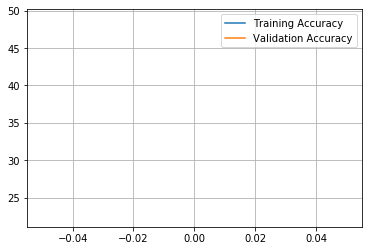

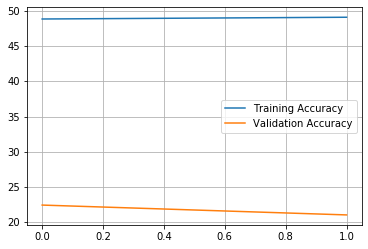

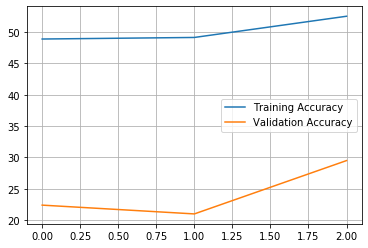

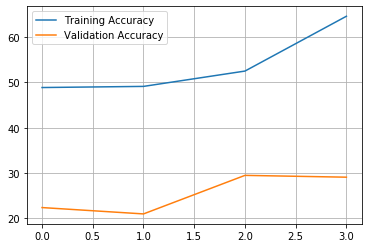

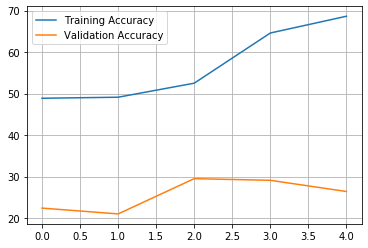

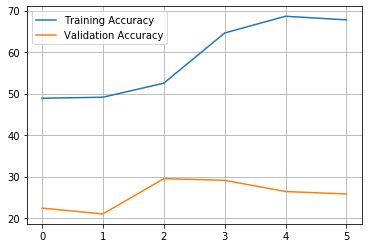

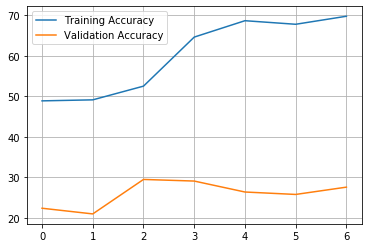

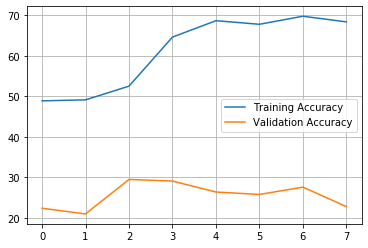

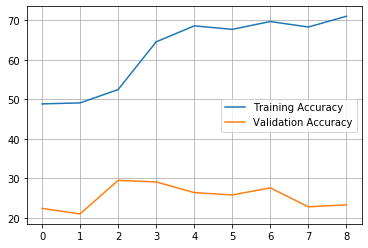

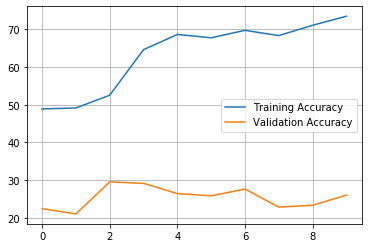

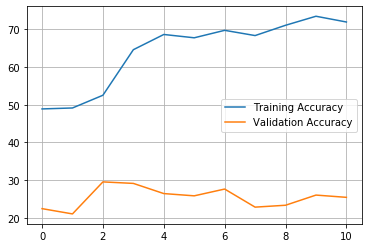

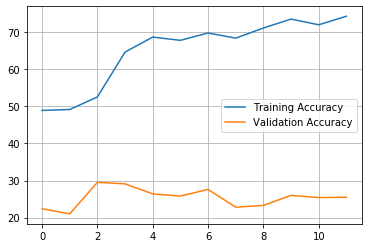

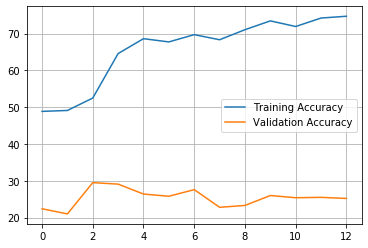

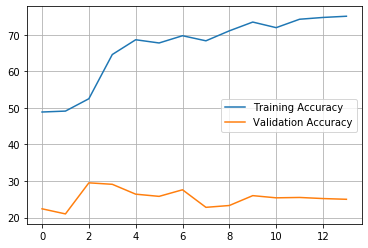

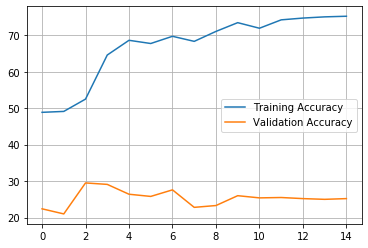

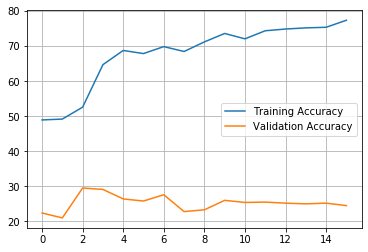

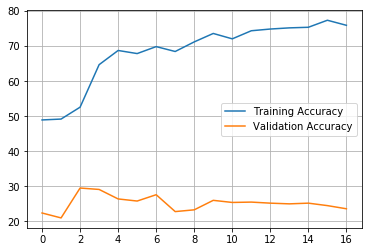

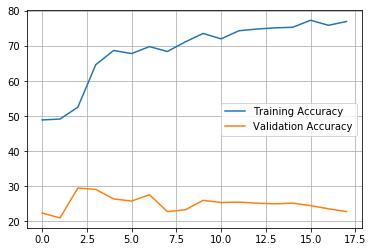

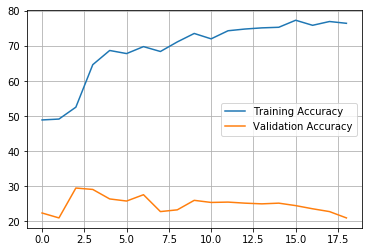

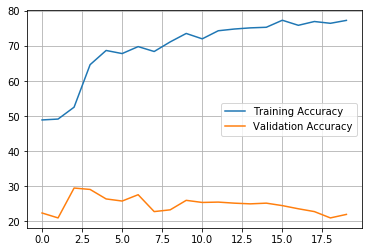

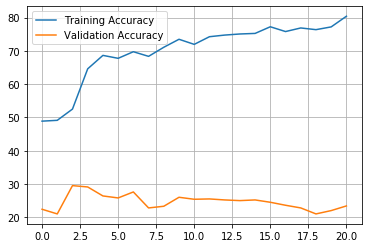

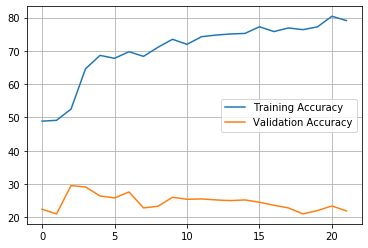

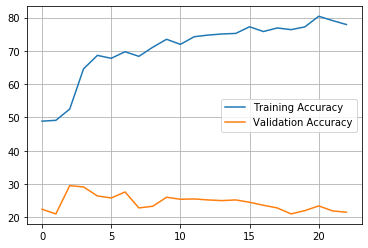

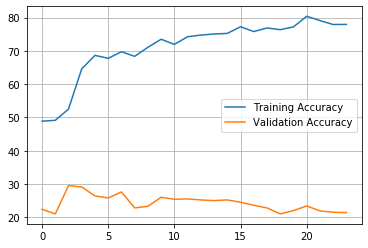

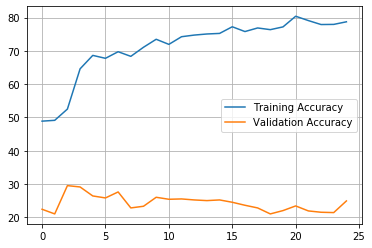

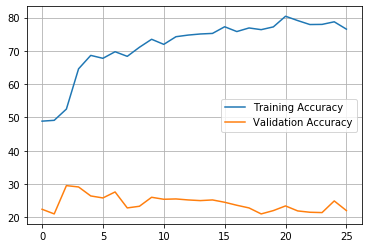

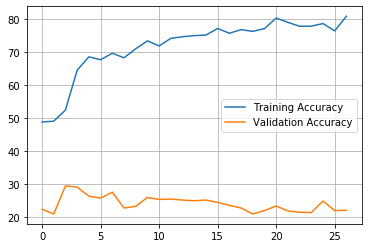

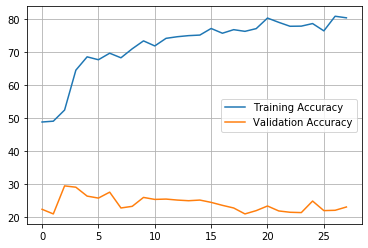

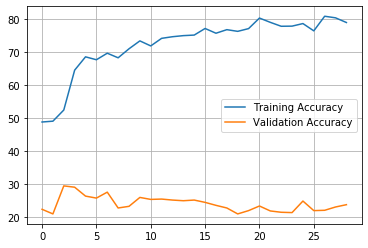

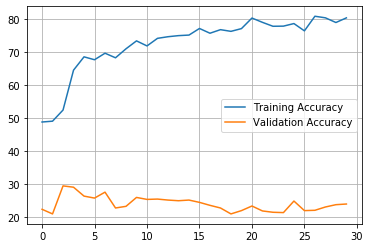

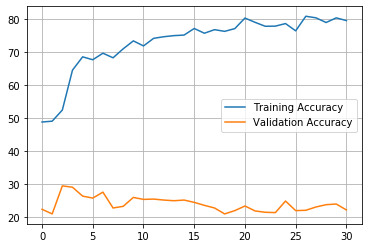

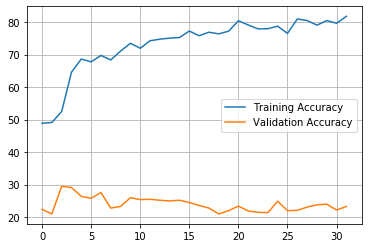

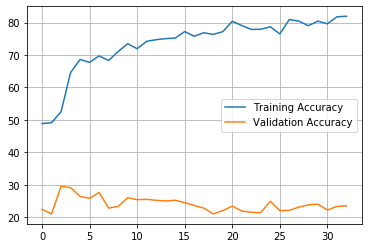

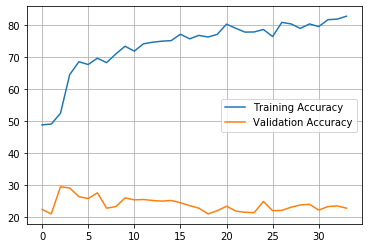

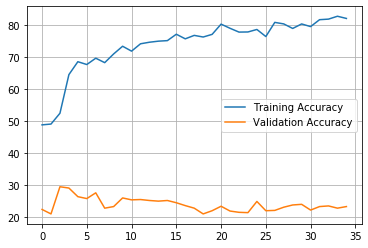

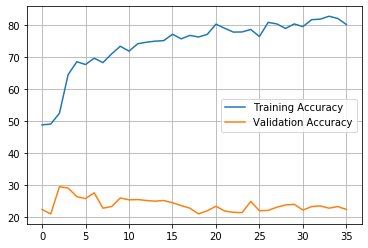

KeyboardInterrupt: 

In [37]:
dnn=pvml.MLP([size+1, 4])

epochs=100
batch_size=64
steps=len(x_train)//batch_size #Automatically adjust steps so that steps*batch_size is almost the number of samples
train_accs=[]
val_accs=[]
ep_vec=[]
plt.ion()
for i in range(epochs):
        dnn.train(x_train, y_train, lr=0.001, lambda_=1e-5, momentum=0.99,
                      steps=steps, batch=batch_size)
        train_labels=dnn.inference(x_train)[0]
        train_acc=(train_labels==y_train).mean()*100
        train_accs.append(train_acc)
        val_labels=dnn.inference(x_val)[0]
        val_acc=(val_labels==y_val).mean()*100
        val_accs.append(val_acc)
        ep_vec.append(i)
        plt.clf()
        plt.plot(ep_vec, train_accs, label="Training Accuracy")
        plt.plot(ep_vec, val_accs, label="Validation Accuracy")
        plt.legend()
        plt.grid(1)
        plt.pause(0.005)
plt.ioff()

test_labels=dnn.inference(x_test)[0]
test_acc=(test_labels==y_test).mean()*100
print("Test Accuracy: ", test_acc)